## 1. Imports

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import os

print(f"{tensorflow.__version__}")

2.6.4


## 2. Constants


In [140]:
DIR = "/kaggle/input/playground-series-s3e3"
TRAIN_PATH = os.path.join(DIR, "train.csv")
TEST_PATH = os.path.join(DIR, "test.csv")
SAMPLE_SUB_PATH = os.path.join(DIR, "sample_submission.csv")
ORIGINAL_PATH = "../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv"

ATTRITION = "Attrition"
EMPLOYEE_NUM = "EmployeeNumber"
print(TRAIN_PATH)

/kaggle/input/playground-series-s3e3/train.csv


## 3. Data import

In [141]:
test_df = pd.read_csv(TEST_PATH)
train_df = pd.read_csv(TRAIN_PATH)
sample_df = pd.read_csv(SAMPLE_SUB_PATH)
original = pd.read_csv(ORIGINAL_PATH)

In [142]:
original = original.rename(columns={EMPLOYEE_NUM: 'id'})
original[ATTRITION] = (original[ATTRITION] == 'Yes').astype(int)

original = original[train_df.columns.tolist()]

In [143]:
def data_description(df):
    print("Data description")
    print(f"Total number of records {df.shape[0]}")
    print(f'number of features {df.shape[1]}\n\n')
    columns = df.columns
    data_type = []
    
    # Get the datatype of features
    for col in df.columns:
        data_type.append(df[col].dtype)
        
    n_uni = df.nunique()
    # Number of NaN values
    n_miss = df.isna().sum()
    
    names = list(zip(columns, data_type, n_uni, n_miss))
    variable_desc = pd.DataFrame(names, columns=["Name","Type","Unique levels","Missing"])
    print(variable_desc)

In [144]:
test_df.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1677,19,Non-Travel,992,Research & Development,1,1,Medical,1,4,...,4,80,0,1,2,2,1,0,0,0
1,1678,45,Travel_Rarely,1136,Sales,4,4,Marketing,1,3,...,3,80,1,7,3,3,2,2,2,2
2,1679,37,Travel_Rarely,155,Research & Development,13,3,Life Sciences,1,4,...,2,80,2,13,2,2,7,7,1,7
3,1680,32,Travel_Rarely,688,Research & Development,1,4,Life Sciences,1,3,...,3,80,0,14,2,2,14,10,11,8
4,1681,29,Travel_Frequently,464,Research & Development,9,1,Life Sciences,1,3,...,1,80,0,1,5,3,1,0,0,0


In [145]:
original.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,80,0,8,0,1,6,4,0,5,1
1,2,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,80,1,10,3,3,10,7,1,7,0
2,4,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,5,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,80,0,8,3,3,8,7,3,0,0
4,7,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,80,1,6,3,3,2,2,2,2,0


In [146]:
sample_df.head()

,id,Attrition
0,1677,0.119261
1,1678,0.119261
2,1679,0.119261
3,1680,0.119261
4,1681,0.119261


In [147]:
def heat_map(df: pd.DataFrame,
            col_name: str,
            num_features):
    mask = np.triu(df[num_features+[col_name]].corr())
    corrmat = df[num_features+[col_name]].corr()
    f, ax = plt.subplots(figsize=(20, 20))
    sns.heatmap(corrmat, square=True, annot=True, fmt='.2f', mask=mask)
    

In [148]:
train_df = train_df.drop('EmployeeCount', axis=1)
original = original.drop('EmployeeCount', axis=1)
test_df = test_df.drop('EmployeeCount', axis=1)
train_df = train_df.drop('StandardHours', axis=1)
original = original.drop('StandardHours', axis=1)
test_df = test_df.drop('StandardHours', axis=1)
train_df = train_df.drop('Over18', axis=1)
original = original.drop('Over18', axis=1)
test_df = test_df.drop('Over18', axis=1)

,Attrition,count
0,0,1477
1,1,200


<AxesSubplot:>

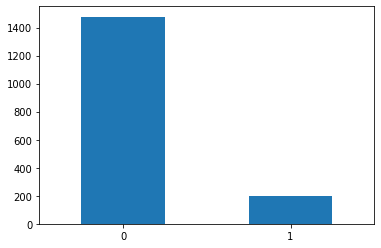

In [149]:
display(pd.DataFrame(train_df['Attrition'].value_counts()).reset_index().rename(columns={'index':'Attrition', 'Attrition':'count'}))
train_df['Attrition'].value_counts().plot(kind='bar', rot=0)

In [150]:
num_features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education',
                'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
                'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 
                'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
                'RelationshipSatisfaction', 'StockOptionLevel',
                'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                'YearsWithCurrManager']
cat_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'source']
target = 'Attrition'

In [151]:
def is_young(x):
    if x <=25:
        return 1
    else:
        return 0
    
def young_and_low_daily_rate(x):
    if x['Age'] <= 25 & x['DailyRate'] < 500:
        return 1
    else:
        return 0

In [152]:
train_df['is_young'] = train_df['Age'].apply(lambda x: is_young(x))
train_df['young_and_underpaid'] = train_df.apply(lambda x: young_and_low_daily_rate(x), axis = 1)
train_df['worklife_stock'] = train_df.apply(lambda x: x['WorkLifeBalance'] + x['StockOptionLevel'], axis = 1)

original['is_young'] = original['Age'].apply(lambda x: is_young(x))
original['young_and_underpaid'] = original.apply(lambda x: young_and_low_daily_rate(x), axis = 1)
original['worklife_stock'] = original.apply(lambda x: x['WorkLifeBalance'] + x['StockOptionLevel'], axis = 1)

test_df['is_young'] = test_df['Age'].apply(lambda x: is_young(x))
test_df['young_and_underpaid'] = test_df.apply(lambda x: young_and_low_daily_rate(x), axis = 1)
test_df['worklife_stock'] = test_df.apply(lambda x: x['WorkLifeBalance'] + x['StockOptionLevel'], axis = 1)

In [153]:
test_df['source'] = 1
train_df['source'] = 1
original['source'] = 0

num_features = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 
                'MonthlyRate', 'PercentSalaryHike', 'TrainingTimesLastYear', 'TotalWorkingYears',
                'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

cat_features = ['BusinessTravel', 'Department','Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
                'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus','NumCompaniesWorked',
                'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
                'WorkLifeBalance','is_young', 'young_and_underpaid']

target = 'Attrition'

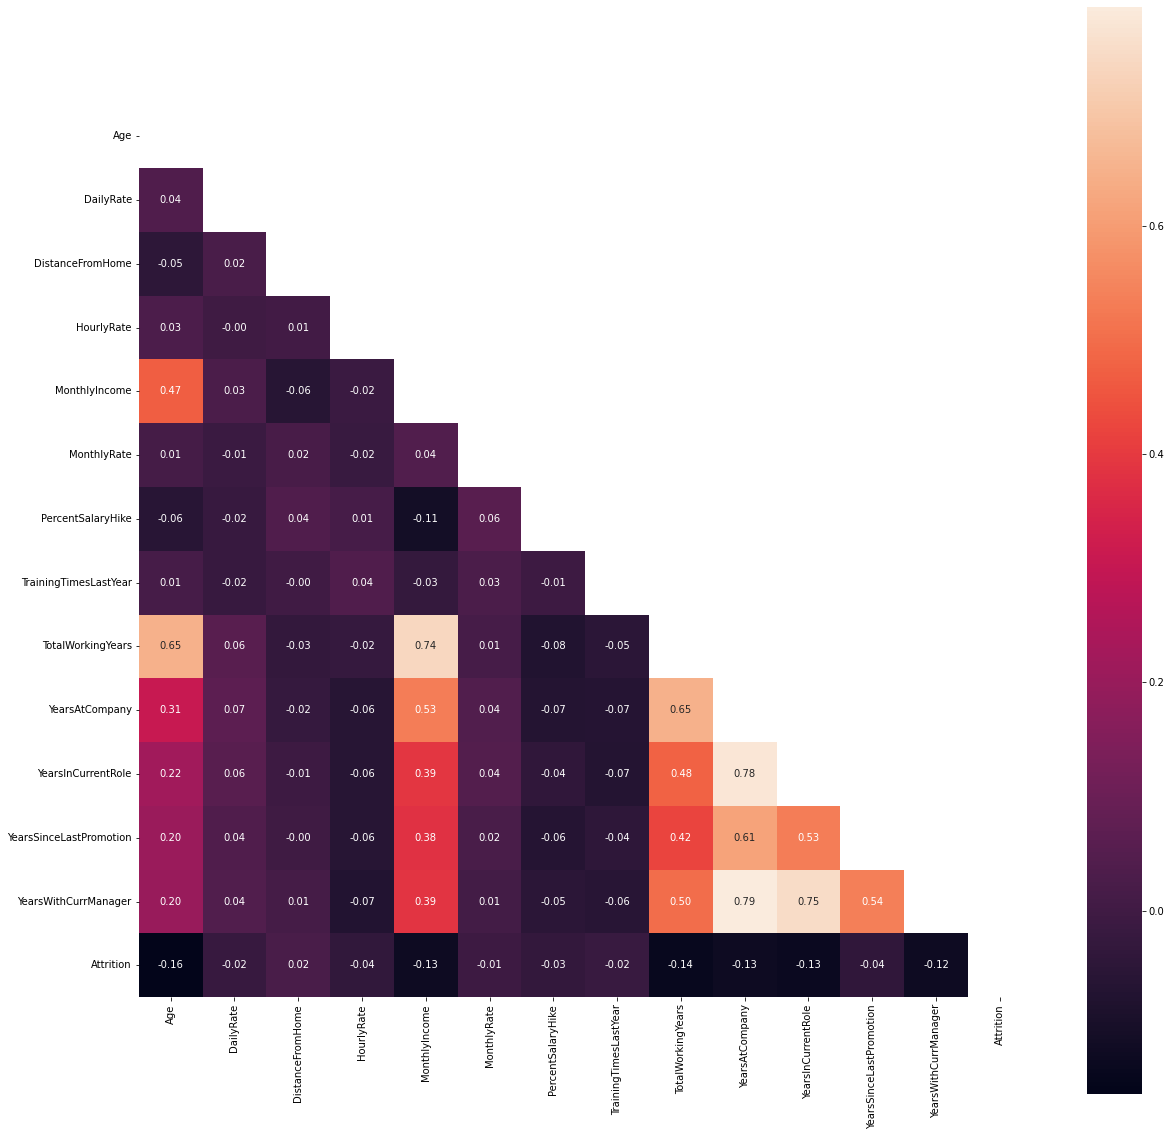

In [154]:
heat_map(df=train_df,
        col_name=target,
        num_features=num_features)

## 4. Train model

In [155]:
train_df = pd.concat([train_df, original])
train_df.reset_index(inplace=True, drop=True)
data_description(train_df)

Data description
Total number of records 3147
number of features 36


                        Name    Type  Unique levels  Missing
0                         id   int64           1952        0
1                        Age   int64             43        0
2             BusinessTravel  object              3        0
3                  DailyRate   int64            901        0
4                 Department  object              3        0
5           DistanceFromHome   int64             29        0
6                  Education   int64              6        0
7             EducationField  object              6        0
8    EnvironmentSatisfaction   int64              4        0
9                     Gender  object              2        0
10                HourlyRate   int64             71        0
11            JobInvolvement   int64              4        0
12                  JobLevel   int64              6        0
13                   JobRole  object              9        0
14           Jo

In [156]:
all_features = train_df.drop(['id', target], axis=1).columns

In [157]:
from category_encoders import WOEEncoder

for col in cat_features:
    train_df[col] = train_df[col].astype(str)
    test_df[col] = test_df[col].astype(str)
    
woe = WOEEncoder(drop_invariant=True, randomized = True)
woe.fit(train_df[all_features], train_df['Attrition'], cols = cat_features)
train_df[all_features] = woe.transform(train_df[all_features])
test_df[all_features] = woe.transform(test_df[all_features])

In [158]:
train_df.OverTime = train_df.OverTime.map(dict(Yes=1, No=0))
train_df.Gender = train_df.Gender.map(dict(Male=1, Female=0))
test_df.OverTime = test_df.OverTime.map(dict(Yes=1, No=0))
test_df.Gender = test_df.Gender.map(dict(Male=1, Female=0))

train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

In [159]:
train_df.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,is_young,young_and_underpaid,worklife_stock,source
0,0,36,0.578862,599,-0.152070,24,0.108647,-0.123842,-0.273434,NaN,...,-0.106661,10,0,7,8,0,-0.117859,-0.034602,4,1
1,1,35,-0.089707,921,0.264114,8,0.108647,-0.285898,0.548289,NaN,...,-0.106661,4,2,0,3,0,-0.117859,-0.034602,4,1
2,2,32,-0.089707,718,0.264114,26,0.108647,0.422624,-0.104693,NaN,...,-0.106661,3,2,1,2,0,-0.117859,-0.034602,5,1
3,3,38,-0.089707,1488,-0.152070,2,0.108647,-0.123842,-0.104693,NaN,...,0.941693,6,0,0,2,0,-0.117859,-0.034602,1,1
4,4,50,-0.089707,1017,-0.152070,5,-0.246834,-0.123842,-0.058159,NaN,...,-0.106661,31,14,4,10,1,-0.117859,-0.034602,3,1


In [160]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

import lightgbm as lgbm
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm.sklearn import LGBMClassifier

In [161]:
clfs = []
scores = []
all_features = train_df.drop(['id', target], axis=1).columns
kf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

params = {'max_depth': 3,
          'learning_rate': 0.1,
          'min_child_weight': 4,
          'subsample': 0.7,
          'colsample_bytree': 0.3
         }

for i, (train_index, val_index) in enumerate(kf.split(train_df, y=train_df['Attrition'])):
    X_train, X_val = train_df[all_features].loc[train_index], train_df[all_features].loc[val_index]
    y_train, y_val = train_df[target][train_index], train_df[target][val_index]
    
    clf = XGBClassifier(**params,
                        n_estimators=20000,
                        seed=42)
    
    clf.fit(X_train.values, y_train,
            early_stopping_rounds=100, 
            eval_set=[(X_val.values, y_val)], 
            eval_metric=['auc'],
            verbose=1000)
    
    preds = clf.predict_proba(X_val.values)
    auc = roc_auc_score(y_val, preds[:, 1])
    
    clfs.append(clf)
    scores.append(auc)
    print(f'Score on fold {i}: {auc}')
    print('-'*50)
    
print(f'Mean score across all folds: {np.mean(scores)}')

[0]	validation_0-auc:0.71583


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[175]	validation_0-auc:0.85466
Score on fold 0: 0.8639718215363971
--------------------------------------------------
[0]	validation_0-auc:0.65167


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[269]	validation_0-auc:0.85173
Score on fold 1: 0.8557531029855754
--------------------------------------------------
[0]	validation_0-auc:0.67301


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[203]	validation_0-auc:0.79873
Score on fold 2: 0.810969473331097
--------------------------------------------------
[0]	validation_0-auc:0.73973


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[607]	validation_0-auc:0.89844
Score on fold 3: 0.9039751761153975
--------------------------------------------------
[0]	validation_0-auc:0.60932


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[617]	validation_0-auc:0.85349
Score on fold 4: 0.8628815833612882
--------------------------------------------------
[0]	validation_0-auc:0.75495


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[212]	validation_0-auc:0.83311
Score on fold 5: 0.8385608856088561
--------------------------------------------------
[0]	validation_0-auc:0.69104


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[288]	validation_0-auc:0.81961
Score on fold 6: 0.8370513250587052
--------------------------------------------------
[0]	validation_0-auc:0.64790


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[204]	validation_0-auc:0.80923
Score on fold 7: 0.8242512657684716
--------------------------------------------------
[0]	validation_0-auc:0.63808


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[196]	validation_0-auc:0.78392
Score on fold 8: 0.7934437483909723
--------------------------------------------------
[0]	validation_0-auc:0.68017


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[152]	validation_0-auc:0.80185
Score on fold 9: 0.8174718956491891
--------------------------------------------------
Mean score across all folds: 0.840833027780595


In [162]:
scores = []

params = {'learning_rate': 0.1,
          'num_leaves': 195,
          'max_depth': 9,
          'min_child_samples': 46,
          'reg_alpha': 0.01,
          'reg_lambda': 0.6,
          'min_split_gain': 1.42,
          'subsample': 0.45,
          'colsample_bytree': 0.3}

for i, (train_index, val_index) in enumerate(kf.split(train_df, y=train_df['Attrition'])):
    X_train, X_val = train_df[all_features].loc[train_index], train_df[all_features].loc[val_index]
    y_train, y_val = train_df[target][train_index], train_df[target][val_index]
    
    clf = lgbm.LGBMClassifier(**params,
                              n_estimators=20000,
                              metric='auc',
                              random_state=42)
    
    clf.fit(X_train.values, y_train, 
            eval_set=[(X_val.values, y_val)],
            eval_metric=['auc'],
            callbacks=[lgbm.early_stopping(100, verbose=True)])
            
    preds = clf.predict_proba(X_val.values)
    auc = roc_auc_score(y_val, preds[:, 1])
    
    clfs.append(clf)
    scores.append(auc)
    print(f'Score on fold {i}: {auc}')
    print('-'*50)
    
print(f'Mean score across all folds: {np.mean(scores)}')

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[65]	valid_0's auc: 0.848373
Score on fold 0: 0.8483730291848374
--------------------------------------------------
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.833781
Score on fold 1: 0.833780610533378
--------------------------------------------------
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.812982
Score on fold 2: 0.8129822207312982
--------------------------------------------------
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.882674
Score on fold 3: 0.8826735994632674
--------------------------------------------------
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.839064
Score on fold 4: 0.8390

In [163]:
scores = []

params = {'loss_function': 'CrossEntropy',
          'learning_rate': 0.76,
          'l2_leaf_reg': 0.014,
          'colsample_bylevel': 0.06,
          'depth': 1,
          'boosting_type': 'Plain',
          'bootstrap_type': 'Bernoulli',
          'min_data_in_leaf': 18,
          'subsample': 0.99}

for i, (train_index, val_index) in enumerate(kf.split(train_df, y=train_df['Attrition'])):
    X_train, X_val = train_df[all_features].loc[train_index], train_df[all_features].loc[val_index]
    y_train, y_val = train_df[target][train_index], train_df[target][val_index]
    
    clf = CatBoostClassifier(**params,
                             iterations=20000,
                             eval_metric='AUC',
                             random_state=42)
    
    clf.fit(X_train.values, y_train, 
            eval_set=(X_val.values, y_val),
            early_stopping_rounds=100, verbose=1000)
    
    preds = clf.predict_proba(X_val.values)
    auc = roc_auc_score(y_val, preds[:, 1])
    
    clfs.append(clf)
    scores.append(auc)
    print(f'Score on fold {i}: {auc}')
    print('-'*90)
    
print(f'Mean score across all folds: {np.mean(scores)}')

0:	test: 0.5829000	best: 0.5829000 (0)	total: 1.16ms	remaining: 23.2s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8752096612
bestIteration = 133

Shrink model to first 134 iterations.
Score on fold 0: 0.875209661187521
------------------------------------------------------------------------------------------
0:	test: 0.5445320	best: 0.5445320 (0)	total: 1.14ms	remaining: 22.7s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8665716203
bestIteration = 403

Shrink model to first 404 iterations.
Score on fold 1: 0.8665716202616571
------------------------------------------------------------------------------------------
0:	test: 0.6121268	best: 0.6121268 (0)	total: 911us	remaining: 18.2s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8241361959
bestIteration = 192

Shrink model to first 193 iterations.
Score on fold 2: 0.8241361959074137
-------------------------------------------------------------------------------------

XGBoost


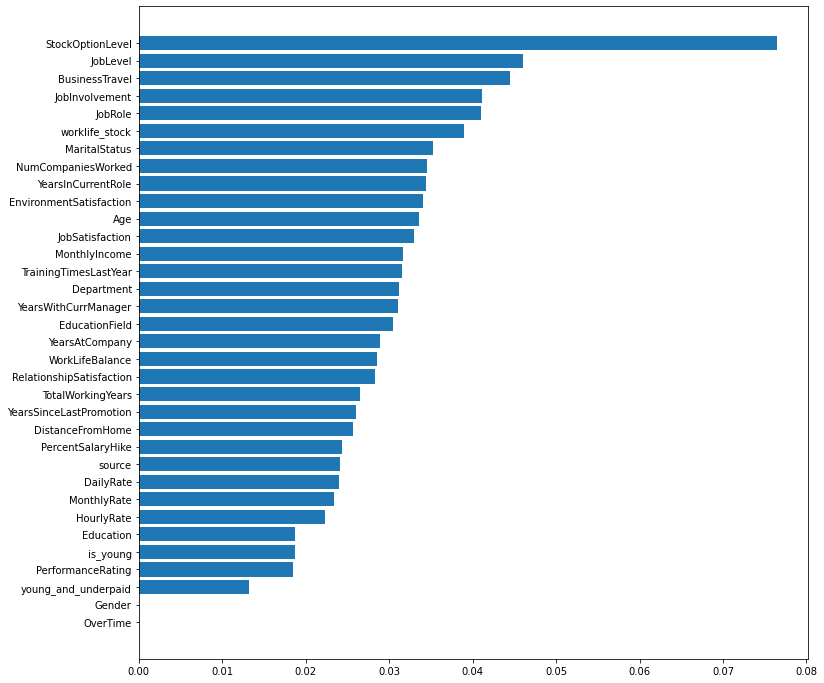

In [164]:
plt.figure(figsize=(12,12))
imp = np.zeros(34)
for clf in clfs[:10]:
    imp+= clf.feature_importances_
    
print('XGBoost')
plt.barh([all_features[i] for i in np.argsort(imp/10)], sorted(imp/10))
plt.show()

LGBM


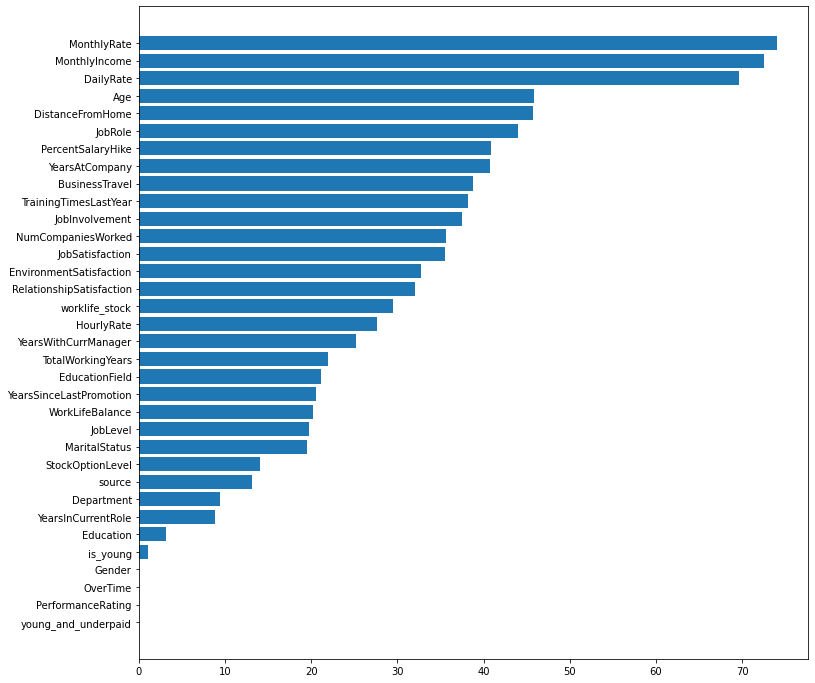

In [165]:
plt.figure(figsize=(12,12))
imp = np.zeros(34)
for clf in clfs[10:20]:
    imp+= clf.feature_importances_
    
print('LGBM')
plt.barh([all_features[i] for i in np.argsort(imp/10)], sorted(imp/10))
plt.show()

CatBoost


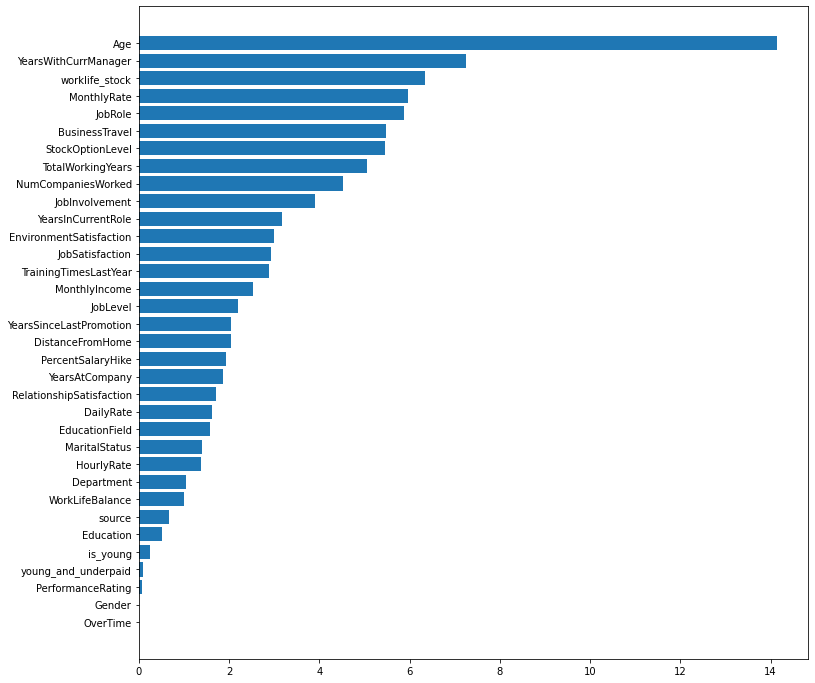

In [166]:
plt.figure(figsize=(12,12))
imp = np.zeros(34)
for clf in clfs[20:]:
    imp+= clf.feature_importances_
    
print('CatBoost')
plt.barh([all_features[i] for i in np.argsort(imp/10)], sorted(imp/10))
plt.show()

In [167]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [168]:
ACTIVATION =  "relu"
model = tf.keras.Sequential([
    Dense(34, activation = ACTIVATION),
    Dropout(0.2),
    Dense(100, activation = ACTIVATION),
    Dropout(0.2),
    Dense(100, activation = ACTIVATION),
    Dropout(0.2),
    Dense(34, activation = ACTIVATION),
    Dense(1, activation = "sigmoid"),
])

In [169]:
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics=['accuracy'])

In [170]:
es_callbacks = EarlyStopping(patience = 20, restore_best_weights = True)

In [171]:
X = train_df.drop(target, axis=1)
y = train_df[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

history = model.fit(X_train, y_train,
                   validation_data = (X_val, y_val),
                   epochs = 100, callbacks = [es_callbacks])

Epoch 1/100
79/79 [==============================] - 1s 6ms/step - loss: 0.6792 - accuracy: 0.8641 - val_loss: 0.6666 - val_accuracy: 0.8492
Epoch 2/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6527 - accuracy: 0.8641 - val_loss: 0.6424 - val_accuracy: 0.8492
Epoch 3/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6286 - accuracy: 0.8641 - val_loss: 0.6203 - val_accuracy: 0.8492
Epoch 4/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6064 - accuracy: 0.8641 - val_loss: 0.6001 - val_accuracy: 0.8492
Epoch 5/100
79/79 [==============================] - 0s 4ms/step - loss: 0.5861 - accuracy: 0.8641 - val_loss: 0.5818 - val_accuracy: 0.8492
Epoch 6/100
79/79 [==============================] - 0s 4ms/step - loss: 0.5675 - accuracy: 0.8641 - val_loss: 0.5651 - val_accuracy: 0.8492
Epoch 7/100
79/79 [==============================] - 0s 4ms/step - loss: 0.5506 - accuracy: 0.8641 - val_loss: 0.5501 - val_accuracy: 0.8492
Epoch 8/100
7

<AxesSubplot:>

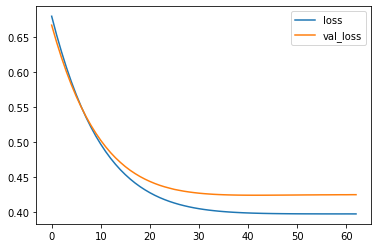

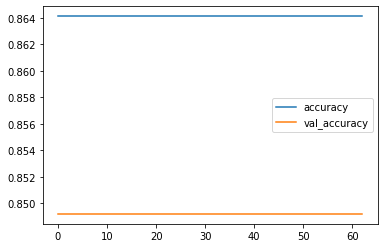

In [172]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

In [173]:
pred_val = model.predict(test_df)
submission_2 = pd.read_csv(SAMPLE_SUB_PATH)
submission_2['pred'] = pred_val
submission_2.head()

,id,Attrition,pred
0,1677,0.119261,0.150124
1,1678,0.119261,0.150124
2,1679,0.119261,0.150124
3,1680,0.119261,0.150124
4,1681,0.119261,0.150124


## 5. Making submission

In [174]:
test_pred_1 = []
test_pred_2 = []
test_pred_3 = []

for clf in clfs[:10]:
    preds = clf.predict_proba(test_df[all_features].values)
    test_pred_1.append(preds[:, 1])
    
for clf in clfs[10:20]:
    preds = clf.predict_proba(test_df[all_features].values)
    test_pred_2.append(preds[:, 1])
    
for clf in clfs[20:]:
    preds = clf.predict_proba(test_df[all_features].values)
    test_pred_3.append(preds[:, 1])

In [175]:
test_pred_1 = np.stack(test_pred_1).mean(0)
test_pred_2 = np.stack(test_pred_2).mean(0)
test_pred_3 = np.stack(test_pred_3).mean(0)

In [176]:
test_preds = test_pred_1*0.4 + test_pred_2*0.3 + test_pred_3*0.3

In [177]:
submission = pd.DataFrame(data={"id": test_df.id, ATTRITION: test_preds})
submission.head()

,id,Attrition
0,1677,0.327251
1,1678,0.063850
2,1679,0.020201
3,1680,0.073292
4,1681,0.608445


In [178]:
submission.to_csv('submission.csv', index=False)

In [179]:
# submission_2.to_csv("submission.csv", index=False)